<a href="https://colab.research.google.com/github/shivamsingh6200/Cat-VS-Dog-Python-Project/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this part used to unzip the uploaded file.

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat vs dog.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

the libraries used for the program

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

This part is used to train the data 

We use a concept called Generators for this process. Keras provides a generator which we will use called   **image_dataset_from_directory** In this case, we set the batch size to 32. When a batch finishes processing, then the next batch is processed. 

The CNN model expects all the images in our dataset to be of same dimensions, but that is not so, therefore we reshape the images to be (256,256,3)

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat vs dog/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat vs dog/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


The images we just successfully compiled and stored are in the form of a numpy array

In the code below, a process function is defined which takes an image and a label, and basically divides the image object by 255 (giving a value between [0,1]) and return back the image and label.

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

We will crete an architecture with 3 convolution layers. In the first layer there would be 32 filters, 64 filters in the second and 128 in the third layer.

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

lets check out the summary of the model we just created.

We can see we have a tensor of (30,30,128), which we flattened, and we are left with close to 14.5 million parameters in our CNN.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

Now we compile and execute our model.

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

This code will help in training.

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
7/7 [==============================] - 11s 220ms/step - loss: 1.1203 - accuracy: 0.5450 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 1s 149ms/step - loss: 0.6961 - accuracy: 0.4750 - val_loss: 0.6907 - val_accuracy: 0.5150
Epoch 3/10
7/7 [==============================] - 1s 171ms/step - loss: 0.6890 - accuracy: 0.5100 - val_loss: 0.6866 - val_accuracy: 0.5300
Epoch 4/10
7/7 [==============================] - 1s 149ms/step - loss: 0.7059 - accuracy: 0.4700 - val_loss: 0.6574 - val_accuracy: 0.6250
Epoch 5/10
7/7 [==============================] - 1s 149ms/step - loss: 0.6338 - accuracy: 0.6350 - val_loss: 0.5641 - val_accuracy: 0.7650
Epoch 6/10
7/7 [==============================] - 1s 150ms/step - loss: 0.5526 - accuracy: 0.7700 - val_loss: 0.4491 - val_accuracy: 0.7850
Epoch 7/10
7/7 [==============================] - 1s 150ms/step - loss: 0.5678 - accuracy: 0.6850 - val_loss: 0.5666 - val_accuracy: 0.7750
Epoch 8/10
7/7 [===

Now that all our 10 epochs have finished training, let's plot see our results. We plot the graphs of training and validation accuracy.

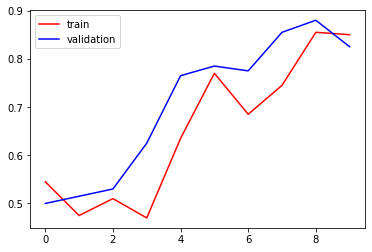

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

We download random image of a dog and a cat to test over and add it to our project's directory. We import OpenCV and use it to parse our image so we can feed it to the model.

In [ ]:
import cv2


test_img contains a numpy array, created from the image we just passed to it.


In [ ]:
test_img = cv2.imread('/content/dog.jpg')

We can plot and see our image. The image's colour (RGB) is not preserved when we import it through OpenCV, as can be seen.

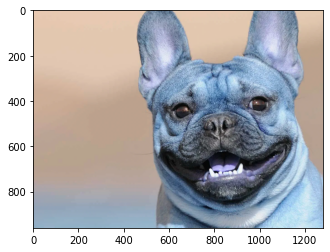

In [ ]:
plt.imshow(test_img)

This will help to see the shape of the image

In [ ]:
test_img.shape

(960, 1280, 3)

We resize our image into (256,256,3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

This means that our batch contains 1 image, with the dimensions of (256,256,3). We store it in test_input.

In [ ]:
test_input = test_img.reshape((1,256,256,3))

Now as we pass our test_input to the predict function, if we get 0 then it means its a cat and if we get 1 then it is a dog

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 214ms/step


array([[1.]], dtype=float32)